# Trading

1. When the trading is correlated.

1. The scale is important.

1. Noise is noise.


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data

In [11]:
from scipy import stats

## Yahoo! Finance

Trading information 

Dow Jones Industrial Average (^DJI)  
DJI - DJI Real Time Price. Currency in USD

NASDAQ Composite (^IXIC)  
Nasdaq GIDS - Nasdaq GIDS Delayed Price. Currency in USD


In [59]:
df1 = data.get_data_yahoo('^DJI', '2015-01-01', '2018-01-01')
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,17951.779297,17731.300781,17823.070312,17832.990234,76270000,17832.990234
2015-01-05,17821.300781,17475.929688,17821.300781,17501.650391,116160000,17501.650391
2015-01-06,17581.050781,17262.369141,17504.179688,17371.640625,101870000,17371.640625
2015-01-07,17597.080078,17374.779297,17374.779297,17584.519531,91030000,17584.519531
2015-01-08,17916.039062,17591.970703,17591.970703,17907.869141,114890000,17907.869141


In [4]:
df2 = data.get_data_yahoo('^IXIC', '2015-01-01', '2018-01-01')
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,4777.009766,4698.109863,4760.240234,4726.810059,1435150000,4726.810059
2015-01-05,4702.770020,4641.459961,4700.339844,4652.569824,1794470000,4652.569824
2015-01-06,4667.330078,4567.589844,4666.850098,4592.740234,2167320000,4592.740234
2015-01-07,4652.720215,4613.899902,4626.839844,4650.470215,1957950000,4650.470215
2015-01-08,4741.379883,4688.020020,4689.540039,4736.189941,2105450000,4736.189941


## between x4 and x5 times ratio 

Values of the Dow Jones Industrial Average is up to 5 times the calue of the NASDAQ Composite 

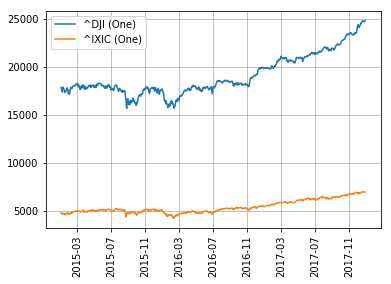

In [40]:
plt.plot(df1['Open'], label = '^DJI (One)')
plt.plot(df2['Open'], label = '^IXIC (One)')
plt.xticks(rotation='vertical')
plt.legend()
plt.grid(True)
plt.show()

## Scale

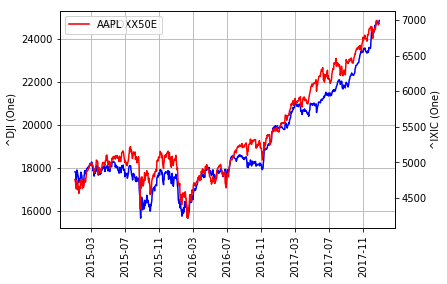

In [52]:
fig, ax1 = plt.subplots()
plt.xticks(rotation = 'vertical')
plt.grid(True)
ax1.plot(df1['Open'], color = 'blue', label = '^STOXX50E')
ax2= ax1.twinx()
ax2.plot(df2['Open'], color = 'red', label = 'AAPL')
ax1.set_ylabel('^DJI (One)')
ax1.legend()
ax2.legend()
ax2.set_ylabel('^IXIC (One)')
plt.show()

In [7]:
d1 = df1['Open']
d2 = df2['Open']

d1 = (d1 - d1.min()) / (d1.max() - d1.min())
d2 = (d2 - d2.min()) / (d2.max() - d2.min())

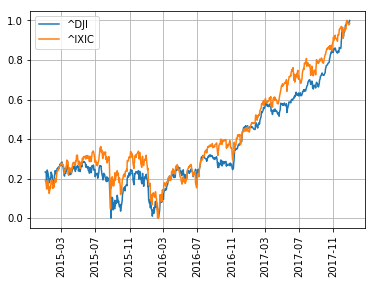

In [56]:
plt.plot(d1, label = '^DJI')
plt.plot(d2, label = '^IXIC')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.grid(True)
plt.show()

## Values are correlated

Linear Regresion 1.021 x + 0.043 (0.981)


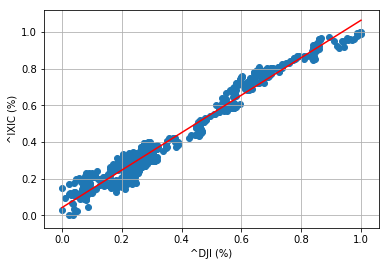

In [62]:
x = d1
y = d2
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x2=np.linspace(mn,mx,500)
y2=gradient*x2+intercept
print('Linear Regresion {0:2.3f} x + {1:2.3f} ({2:2.3f})'.format(gradient, intercept, r_value))

plt.scatter(x, y)
plt.plot(x2,y2,'-r')

plt.xlabel('^DJI (%)')
plt.ylabel('^IXIC (%)')
plt.grid(True)
plt.show()


## Instant variations are not correlated

In [19]:
d1_diff = np.diff(d1)
d2_diff = np.diff(d2)

In [20]:
x = d1_diff
y = d2_diff
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x2=np.linspace(mn,mx,500)
y2=gradient*x2+intercept
print('Linear Regresion {0:2.3f} x + {1:2.3f} ({2:2.3f})'.format(gradient, intercept, r_value))


Linear Regresion 0.663 x + 0.000 (0.520)


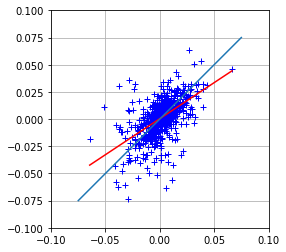

In [31]:
fig, ax = plt.subplots()
plt.plot(x,y,'+b')
plt.plot(x2,y2,'-r')
plt.plot([-0.075, 0.075], [-0.075, 0.075])
ax.set_aspect(1.0)
plt.axis([-0.1, 0.1, -0.1, 0.1])
plt.grid(True)
plt.show()

## 3. Noise is noise.

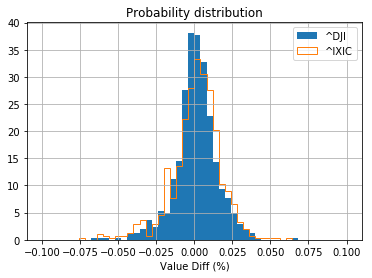

In [66]:
plt.figure()
plt.title('Probability distribution')
plt.hist(d1_diff, bins = 50, label = '^DJI', normed = True, range = [-.10, .10])
plt.hist(d2_diff, bins = 50, histtype = 'step', label = '^IXIC', normed = True, range = [-.10, .10])
plt.xlabel('Value Diff (One)')
plt.legend()
plt.grid(True)
plt.show()

"If you cannot explain something in simple terms, you don't understand it"  
Richard Feyman